# <font style = "color:rgb(50,120,229)">Dlib’s 68-Points Model</font>

The image below shows all the landmarks and their corresponding indices in Dlib’s array. In many applications we are concerned with use only a few facial landmarks. In those cases, the figure below can be used for quick reference. In this notebook, we will show how to detect these points, plot them on a face image and save them to file. 

<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w3-m1-68pointModel.png" width=500/></center>

# <font style = "color:rgb(50,120,229)">Facial Landmark Detection in Dlib</font>

Landmark detection is a two step process.

## <font style="color:rgb(50,120,229)">Face Detection </font>
In the first step, you need to detect the face in an image. For best results we should use the same face detector used in training the landmark detector.  The output of a face detector is a rectangle (x, y, w, h) that contains the face. 

We have seen that OpenCV’s face detector is based on HAAR cascades. Dlib’s face detector is based on Histogram of Oriented Gradients features and Support Vector Machines (SVM). 


## <font style="color:rgb(50,120,229)">Landmark detection</font>
The landmark detector finds the landmark points inside the face rectangle. 


## <font style = "color:rgb(50,120,229)">Facial Landmark Detection Code</font>

In this section we will go step by step over the code for facial landmark detection on an image and save the results to disk. 

In [0]:
import dlib
import cv2
import numpy as np

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Initialize the Face detector</font>

Dlib has a built-in face detector which can be accessed using **`get_frontal_face_detector()`**. Notice that we did not have to specify a model file for Dlib’s face detector because the face detector is built into the code.

In [0]:
# Get the face detector instance
faceDetector = dlib.get_frontal_face_detector()

## <font style="color:rgb(50,120,229)">Initialize the Landmark Predictor (a.k.a Shape predictor)</font>

The **`shape_predictor`** class implements Dlib’s facial landmark detector. As the name suggests, it can be used to detect other landmark points ( e.g. the four corners of a credit card ) when trained to do so. Load the facial landmark detector model file. The information in the file makes the generic **`shape_predictor`** - a facial landmark detector.

In [0]:
MODEL_PATH = "./data/models/shape_predictor_68_face_landmarks.dat"
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(MODEL_PATH)

In [0]:
# Read image
imageFilename = "./images/tv_2person.jpg"
im= cv2.imread(imageFilename)
#cap = cv2.VideoCapture('./videos/000.mp4') # image from video
#_, im = cap.read()

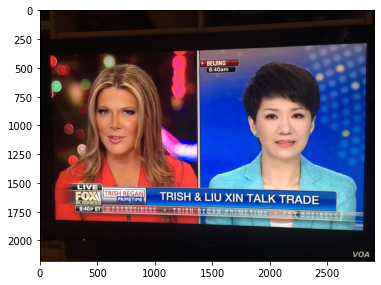

In [47]:
plt.imshow(im[:,:,::-1])
plt.show()

## <font style="color:rgb(50,120,229)">Detect Faces </font>

First, we need to detect faces by passing the image to Dlib’s face detector. In the example image, there are multiple faces. The 0 signifies that no upscaling is done. To detect small faces, you can upscale the image.

In [48]:
# Detect faces in the image
faceRects = faceDetector(im, 0)
print("Number of faces detected: ",len(faceRects))

Number of faces detected:  2


## <font style="color:rgb(50,120,229)">Detect landmarks for each face</font>

Next, we loop over all the face rectangles and perform landmark detection for every face.

Dlib’s landmark detector needs two inputs 
1. Input image. 
2. Face rectangle

The output landmarks are stored in an instance of the class full_object_detection. 

A few important methods of full_object_detection are listed below
1. `num_parts()` : Number of landmark points. 
2. `part(i)` : The ith landmark point
3. `part(i).x()` and `part(i).y()` can be used to access the x and y coordinates of the ith landmark point.
 
We will use these methods very frequently.

The `landmarkDetector` detects the landmarks and all the detected landmarks are stored in a list `landmarksAll`

face 0 : (435,782)-(881,1228)
Number of landmarks 68
face 1 : (1830,760)-(2365,1295)


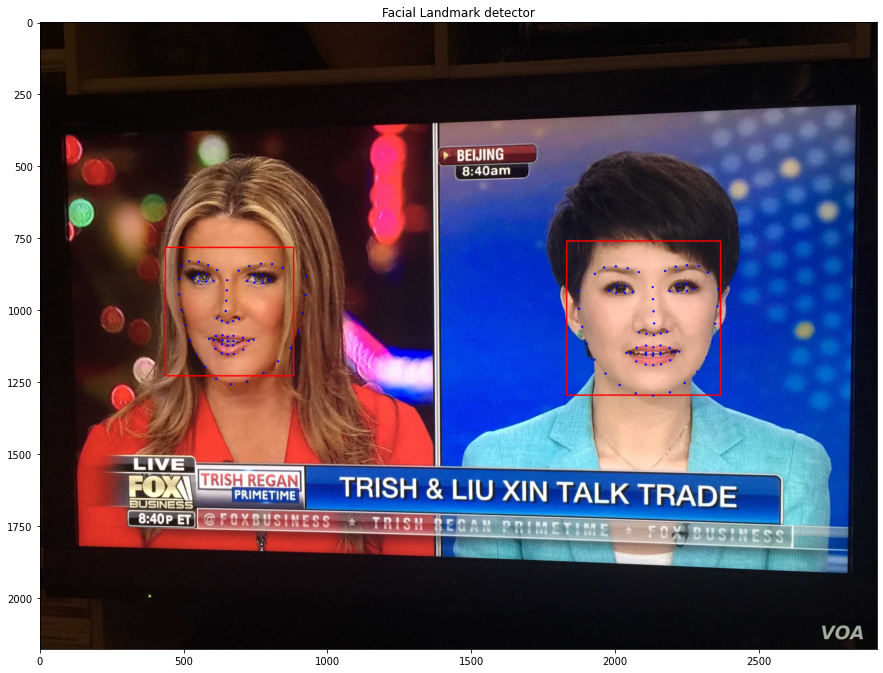

In [49]:
# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  # draw rect on detected face
  x1 = faceRects[i].left()
  y1 = faceRects[i].top()
  x2 = faceRects[i].right()
  y2 = faceRects[i].bottom()
  cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255), 3)
  print('face {} : ({},{})-({},{})'.format(i, x1, y1, x2, y2))

  # For every face rectangle, run landmarkDetector
  landmarks = landmarkDetector(im, faceRects[i])
  # Print number of landmarks
  if i==0:
    print("Number of landmarks",len(landmarks.parts()))

  # draw landmark points
  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    cv2.circle(im, (x, y), 4, (255, 0, 0), -1)

plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title("Facial Landmark detector")
plt.show()